# Introduction
The Titanic disaster of 1912 remains one of the most infamous maritime tragedies in history. The sinking of the RMS Titanic resulted in the loss of over 1,500 lives, and it has since become a poignant case study for understanding survival factors in life-and-death situations. The Kaggle Titanic competition leverages this historical event to provide a compelling and educational dataset for data science enthusiasts.

In this competition (https://www.kaggle.com/competitions/titanic/overview), participants are tasked with building predictive models to determine the likelihood of survival for passengers based on various features such as age, gender, class, and more. While traditional machine learning models like logistic regression, decision trees, and random forests have been widely used to tackle this problem, we will be using a deep learning approach as required in accordance with the subject matter of the "Intro to Deep Learning" Course.

In this submission, I will detail the steps taken to preprocess the data, design the neural network architecture, and evaluate the model's performance. This exercise serves as both a practical application of deep learning techniques and a pedagogical tool for understanding the intricacies of model building and evaluation. The methods used here are easily extended to more practical applications of binary classification, like predicting credit card or loan approval, or classification of fraudulent credit card or bank activity.


# Preparation for analysis and model Building
## Data Import

In [102]:
import pandas as pd
train = pd.read_csv('train.csv')
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset has 12 columns. Here is a brief description of each one:

1) PassengerId: A unique identifier assigned to each passenger. This column is primarily used to identify passengers and does not have predictive value. We will remove it from the dataset.

2) Survived: A binary classifier indicating whether the passenger survived (1) or did not survive (0). This is the target variable we aim to predict in the test set once our model is trained on the training set.

3) Pclass: The passenger's class, which indicates the socio-economic status. It can be first, second, or third class.

4) Name: The full name of the passenger, which often includes titles that can provide additional information about the passenger's social status or marital status. Similar to PassengerId, this column is just used to identify passengers and does not have predictive value. We will remove it from the dataset.

5) Sex: The gender of the passenger. It is a categorical variable with two possible values: 'male' and 'female'. 

6) Age: The age of the passenger in years. 

7) SibSp: The number of siblings or spouses the passenger had aboard the Titanic. 

8) Parch: The number of parents or children the passenger had aboard the Titanic. Similar to SibSp, this helps in understanding family connections.

9) Ticket: The ticket number associated with the passenger. This is a mix of alphanumeric characters. Similar to PassengerId, this column is just used to identify passengers and does not have predictive value. We will remove it from the dataset.

10) Fare: The fare paid by the passenger for the journey. This is a continuous variable and can be indicative of the passenger's socio-economic status.

11) Cabin: The cabin number assigned to the passenger. While in theory there may be predictive value in this column (i.e. there may be different classes of cabins), we will delete it for two reasons. 
    - First of all, about 75% of the entries are missing and we cannot easily interpolate the values since they are not numeric. 
    - Secondly, any predictive value can reasonably be assumed to be redundant and already included in the "Fare" and "Pclass" columns

12) Embarked: The port of embarkation, indicating where the passenger boarded the Titanic. It has three possible values:
    - Cherbourg (C)
    - Queenstown (Q)
    - Southampton (S)

## Exploratory Data Analysis and Data Cleaning

### Remove Unneeded Columns
First we will remove unneeded columns as described above

In [103]:
# List of columns to drop
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# Drop the columns
train_2 = train.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataset to confirm the changes
display(train_2.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Next, we will proceed with a univariate exploration.
First, we will look at the distribution of the categorical variables
### Categorical Variables

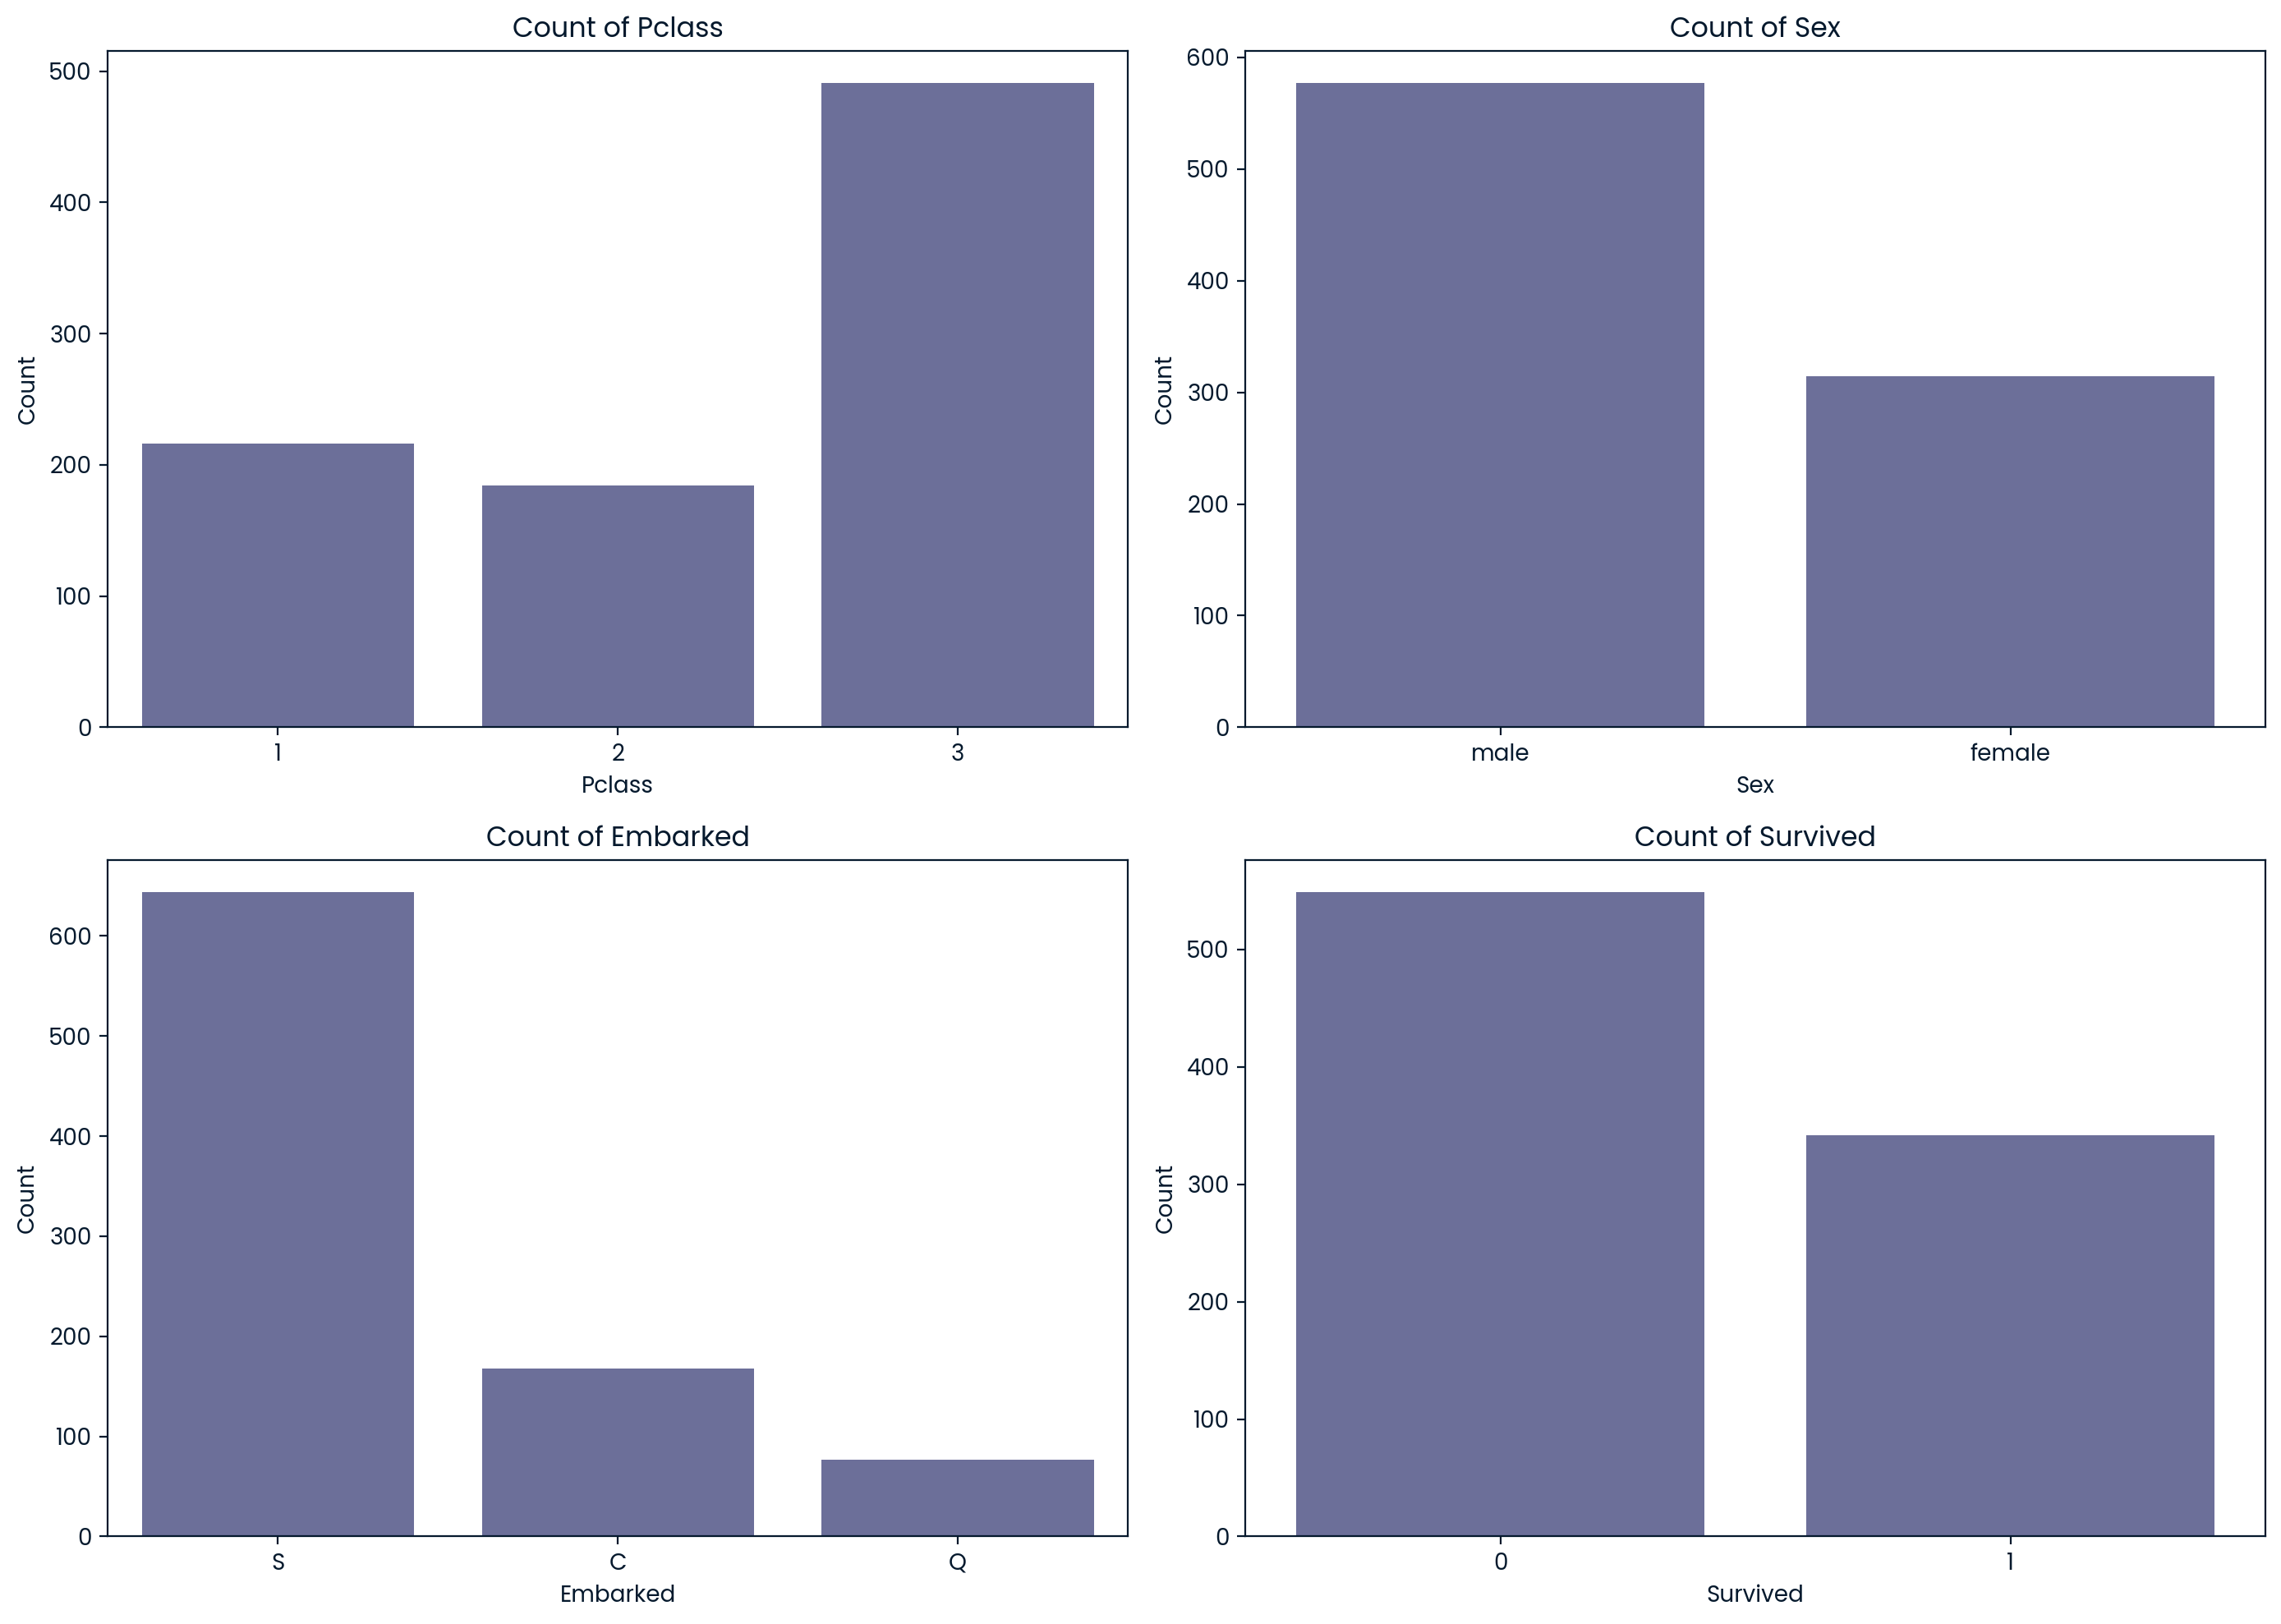

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to plot
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Survived']

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create bar plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=train_2, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()




We learn the following:
1) that most passengers were in 3rd class
2) there were more men than women
3) most passengers did not survive
4) Most passengers embarked from Southampton

Next, we will look at the continuous numeric variables
### Numerical Continuous Variables

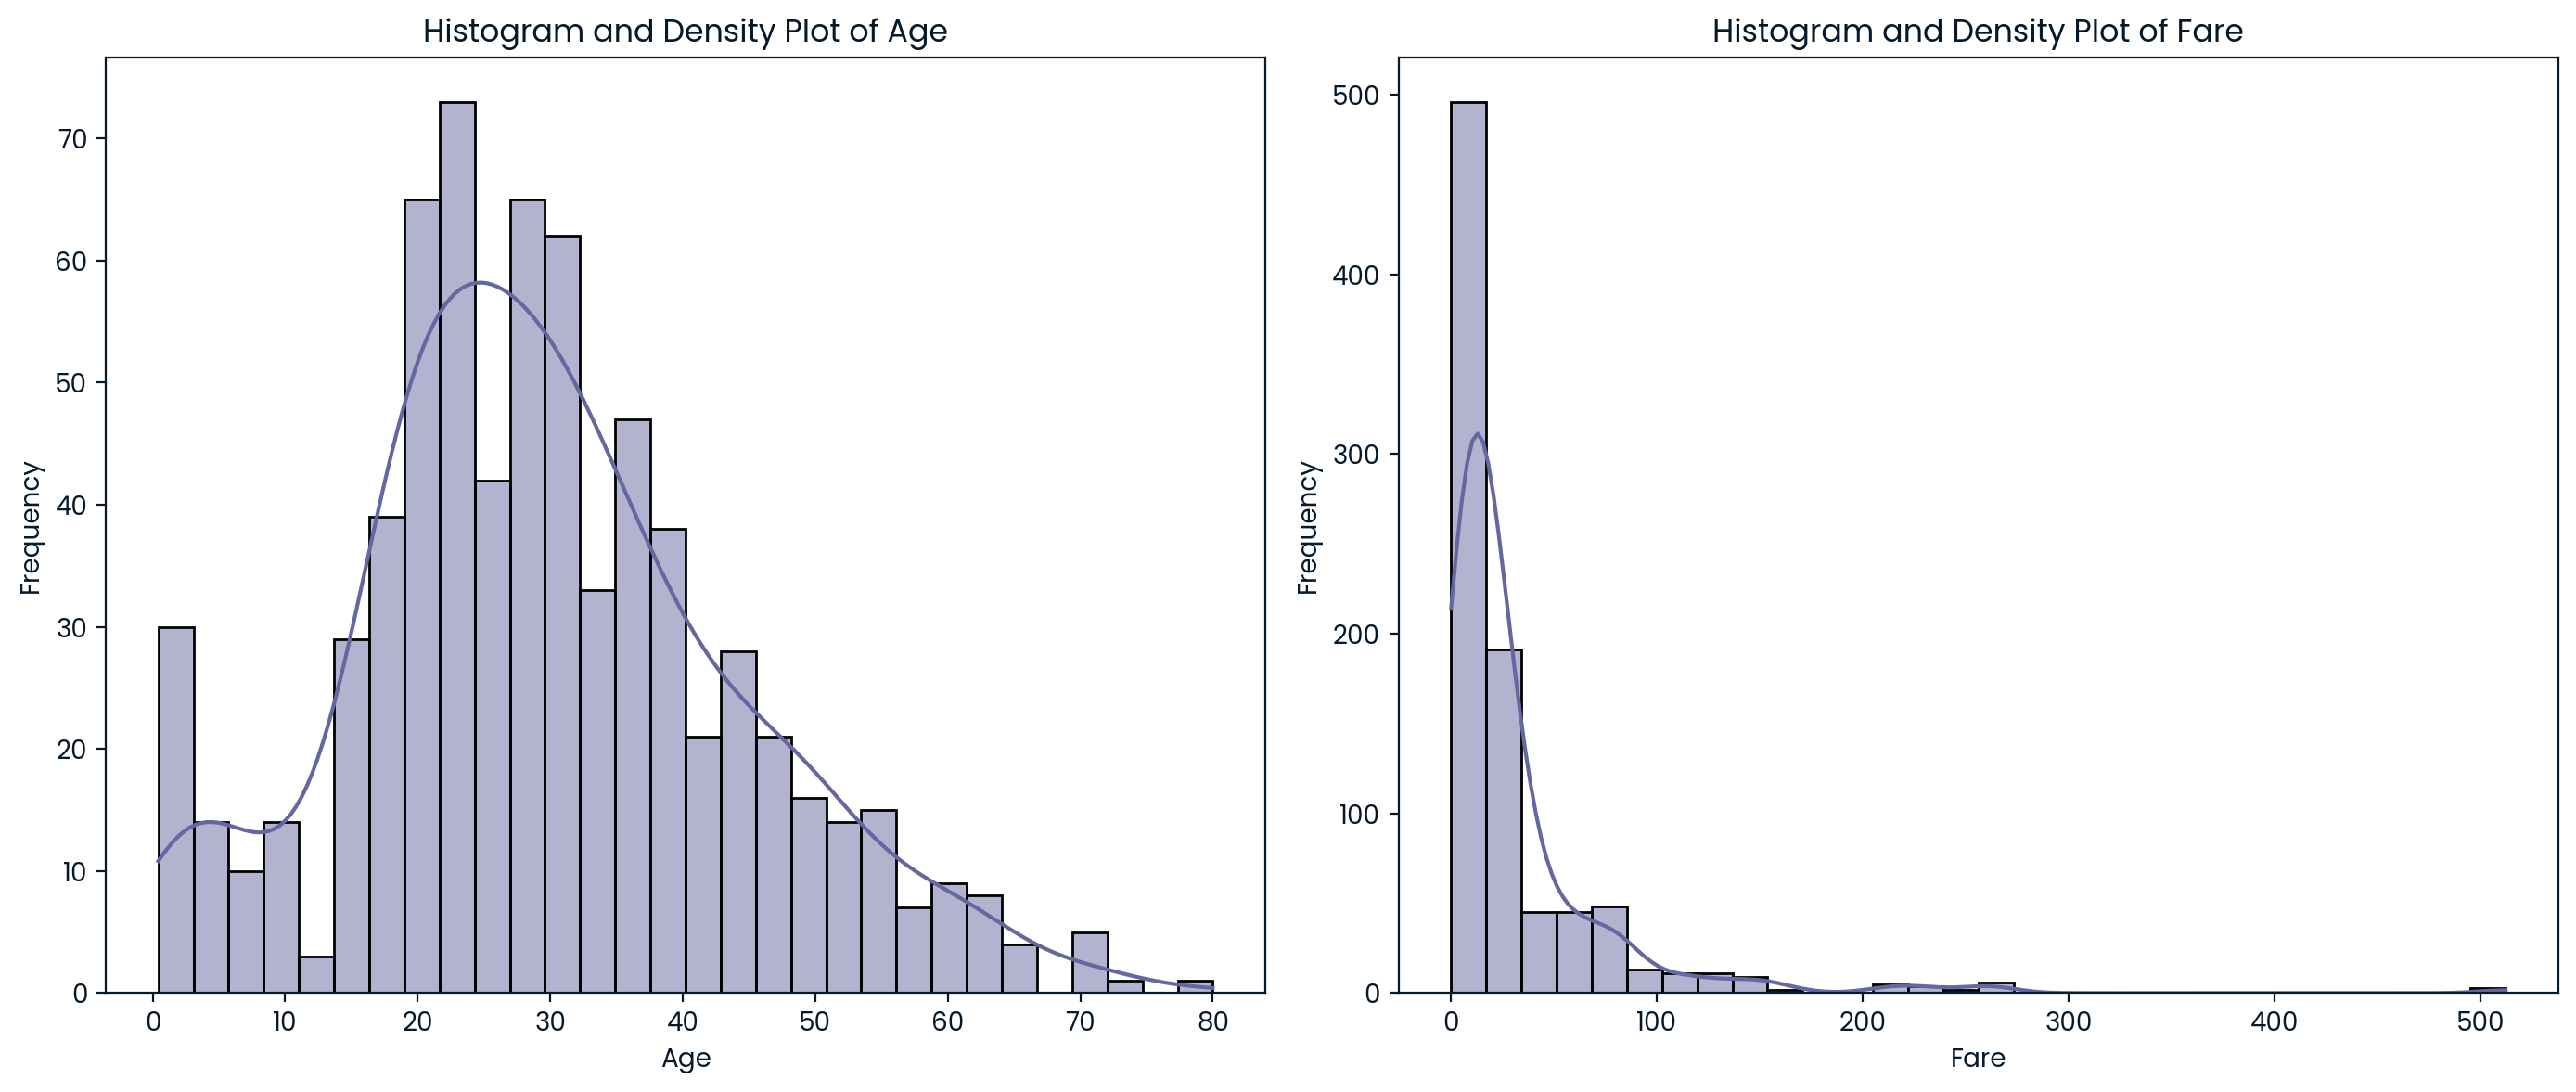

In [105]:
# List of continuous columns to plot
continuous_columns = ['Age', 'Fare']

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create histograms overlaid with density plots for each continuous column
for i, col in enumerate(continuous_columns):
    sns.histplot(train_2[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram and Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

We learn that:
1) The distribution of age is roughly gaussian
2) In contrast, the distribution of Fare is highly skewed to the right. This aligns with the fact the largest group of passengers were in 3rd class, as we saw above

### Numerical Discrete Variables
Finally, we will look at the distribution of the discrete numerical variables.

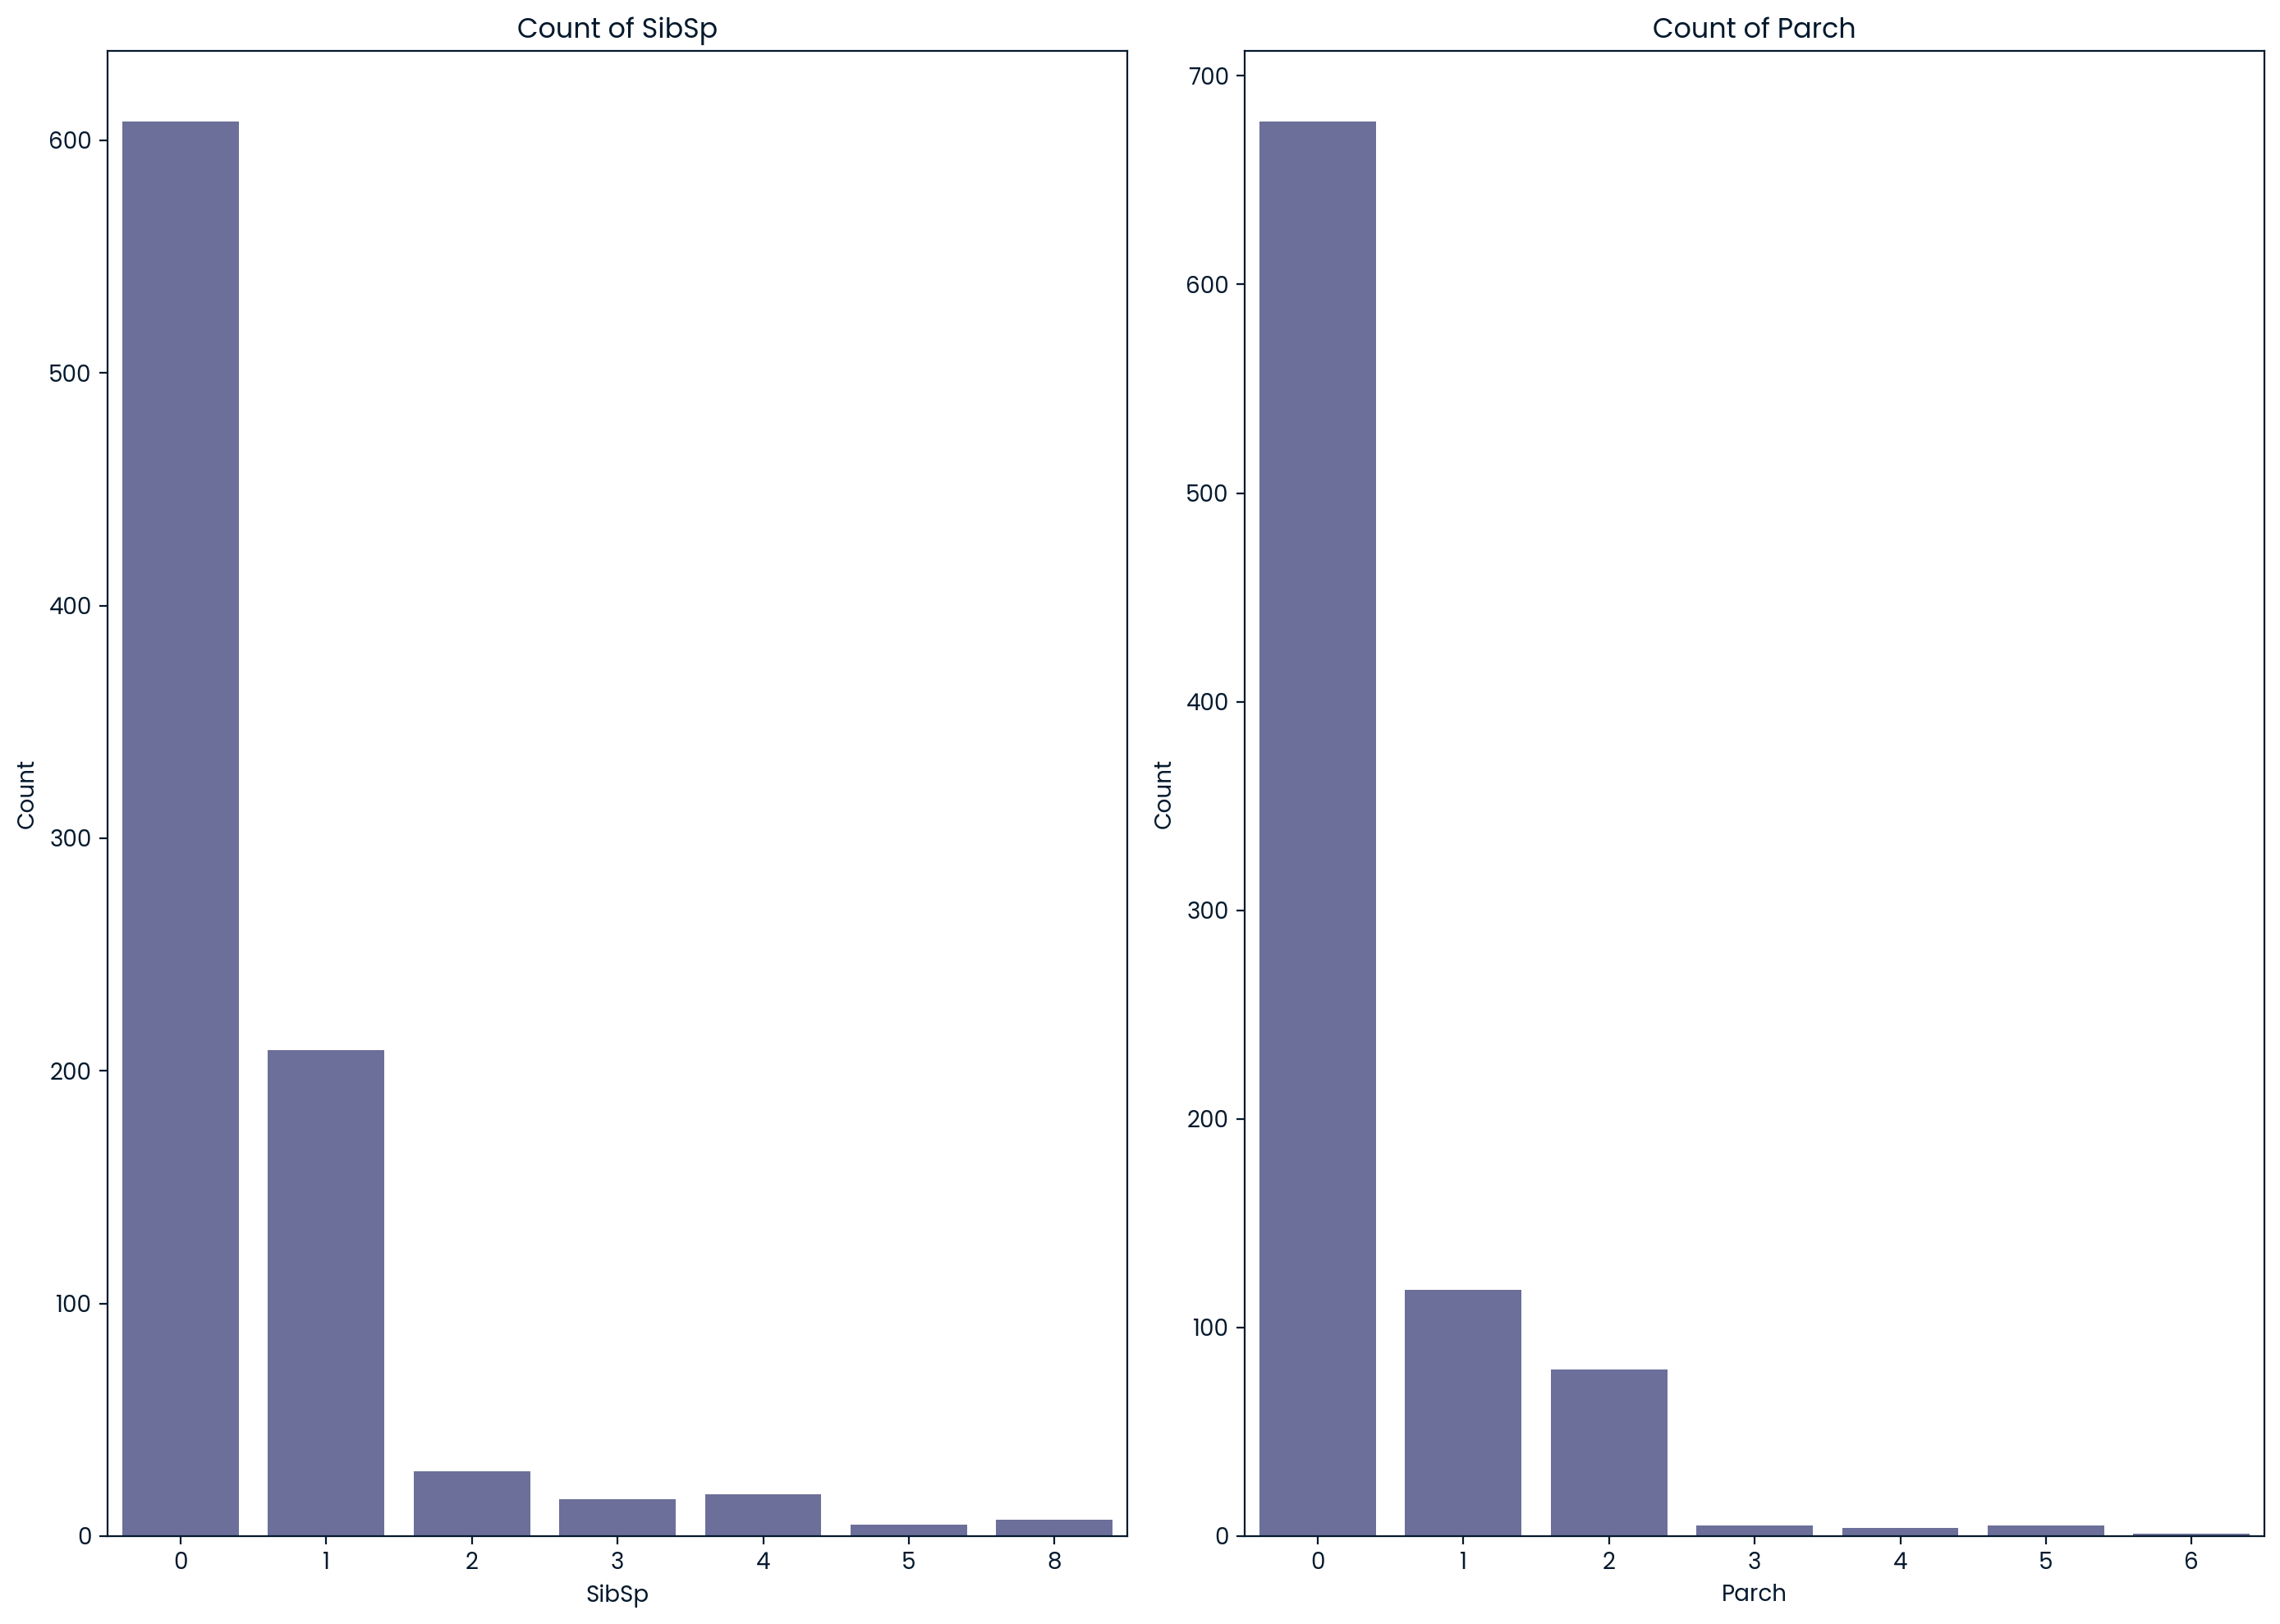

In [106]:
# List of categorical columns to plot
categorical_columns = ['SibSp', 'Parch']

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create bar plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=train_2, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

We see that the distribution of siblings/spouses and parents/children is also skewed right. The majority of passengers were traveling without family.

### Missing Values and Imputation
Now, we will check for missing values

In [107]:
# Count the number of missing values in each column
missing_values = train_2.isnull().sum()

# Display the missing values count
print(missing_values)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


We will replace the 2 missing Embarked values with Southampton, as it was the most frequently occuring location of embarking

In [108]:
train_2['Embarked'].fillna('S', inplace=True)

# Verify no more missing values
print("Missing values in 'Embarked' after filling:", train_2['Embarked'].isnull().sum())

Missing values in 'Embarked' after filling: 0


We also need to address the issue of the missing Age entries. An intuitive way to do this is to impute the average. However, we first want to look at a correlation heatmap. This will give us additional insight we need in general, and may also help us better impute the missing age values

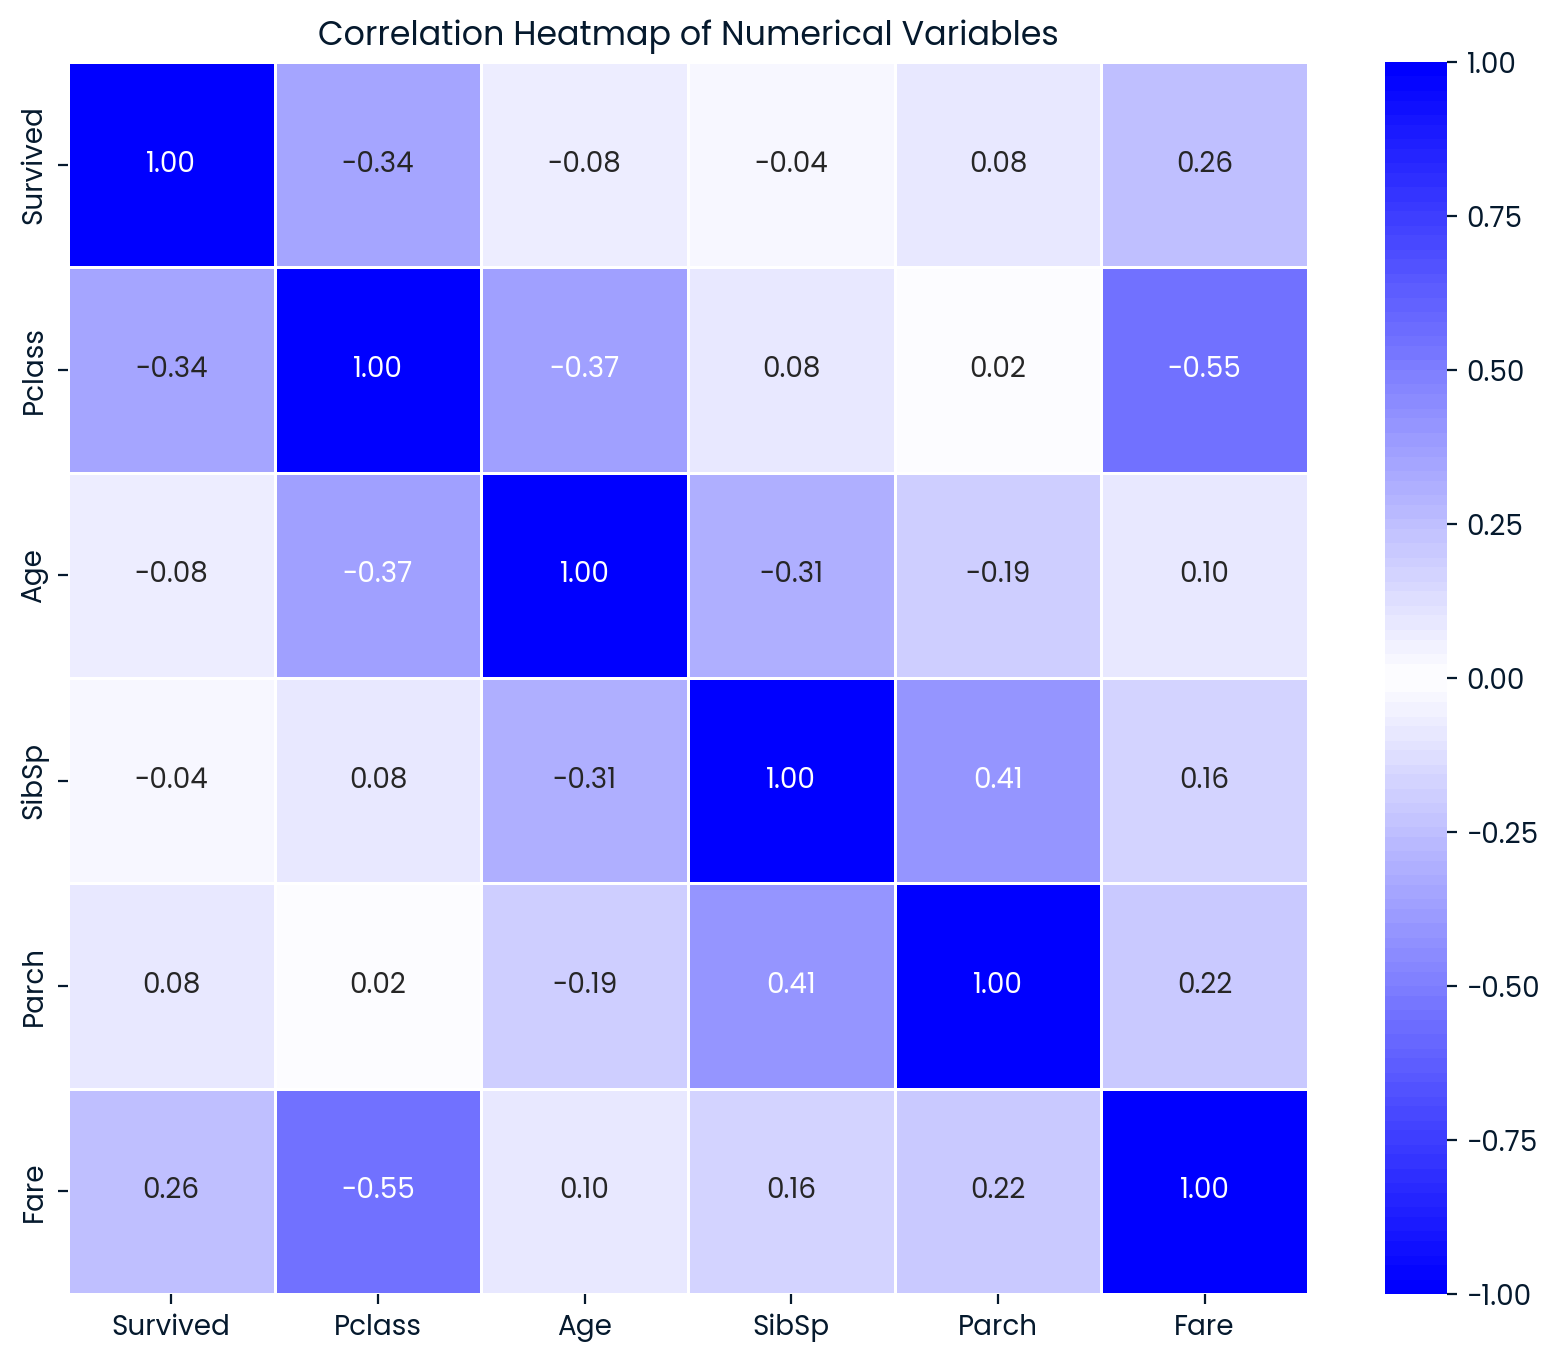

In [109]:
from matplotlib.colors import LinearSegmentedColormap

# Select only numerical columns for correlation
numerical_columns = train_2.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = train_2[numerical_columns].corr()

# Create a custom colormap so that positive and negative correlations have equal visulaization
colors = ["blue", "white", "blue"]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = "blue_white_blue"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=0.5, center=0, vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Heatmap of Numerical Variables')

# Show the plot
plt.show()

Two interesting findings:
1) Not unexpectedly, we see that the strongest predictors of survival were Fare and Pclass, which are themselves closely related. This shows that wealthier passengers were given priority.   
2) There are no particularly strong correlations between age and other variables. We do see that the older the passengers are, they are slightly more likely to be in a higher class (negative correlation is due to higher class being a lower number) and are slightly more likely to not be traveling with siblings or spoust (SibSp). For the purposes of this assignment, we will continue with mean interpolation. We can always go back and fine-tune later if we need to

In [110]:
# Display the number of missing values in the 'Age' column before imputation
print("Missing values in 'Age' before imputation:", train_2['Age'].isnull().sum())

# Calculate the mean of the 'Age' column
mean_age = train_2['Age'].mean()
display(mean_age)

# Fill missing values in the 'Age' column with the mean value
train_2['Age'].fillna(mean_age, inplace=True)

# Display the number of missing values in the 'Age' column after imputation
print("Missing values in 'Age' after imputation:", train_2['Age'].isnull().sum())


Missing values in 'Age' before imputation: 177


29.69911764705882

Missing values in 'Age' after imputation: 0


lets examine the change in correlation values to ensure that mean imputation did not significantly alter the charachter of the dataset

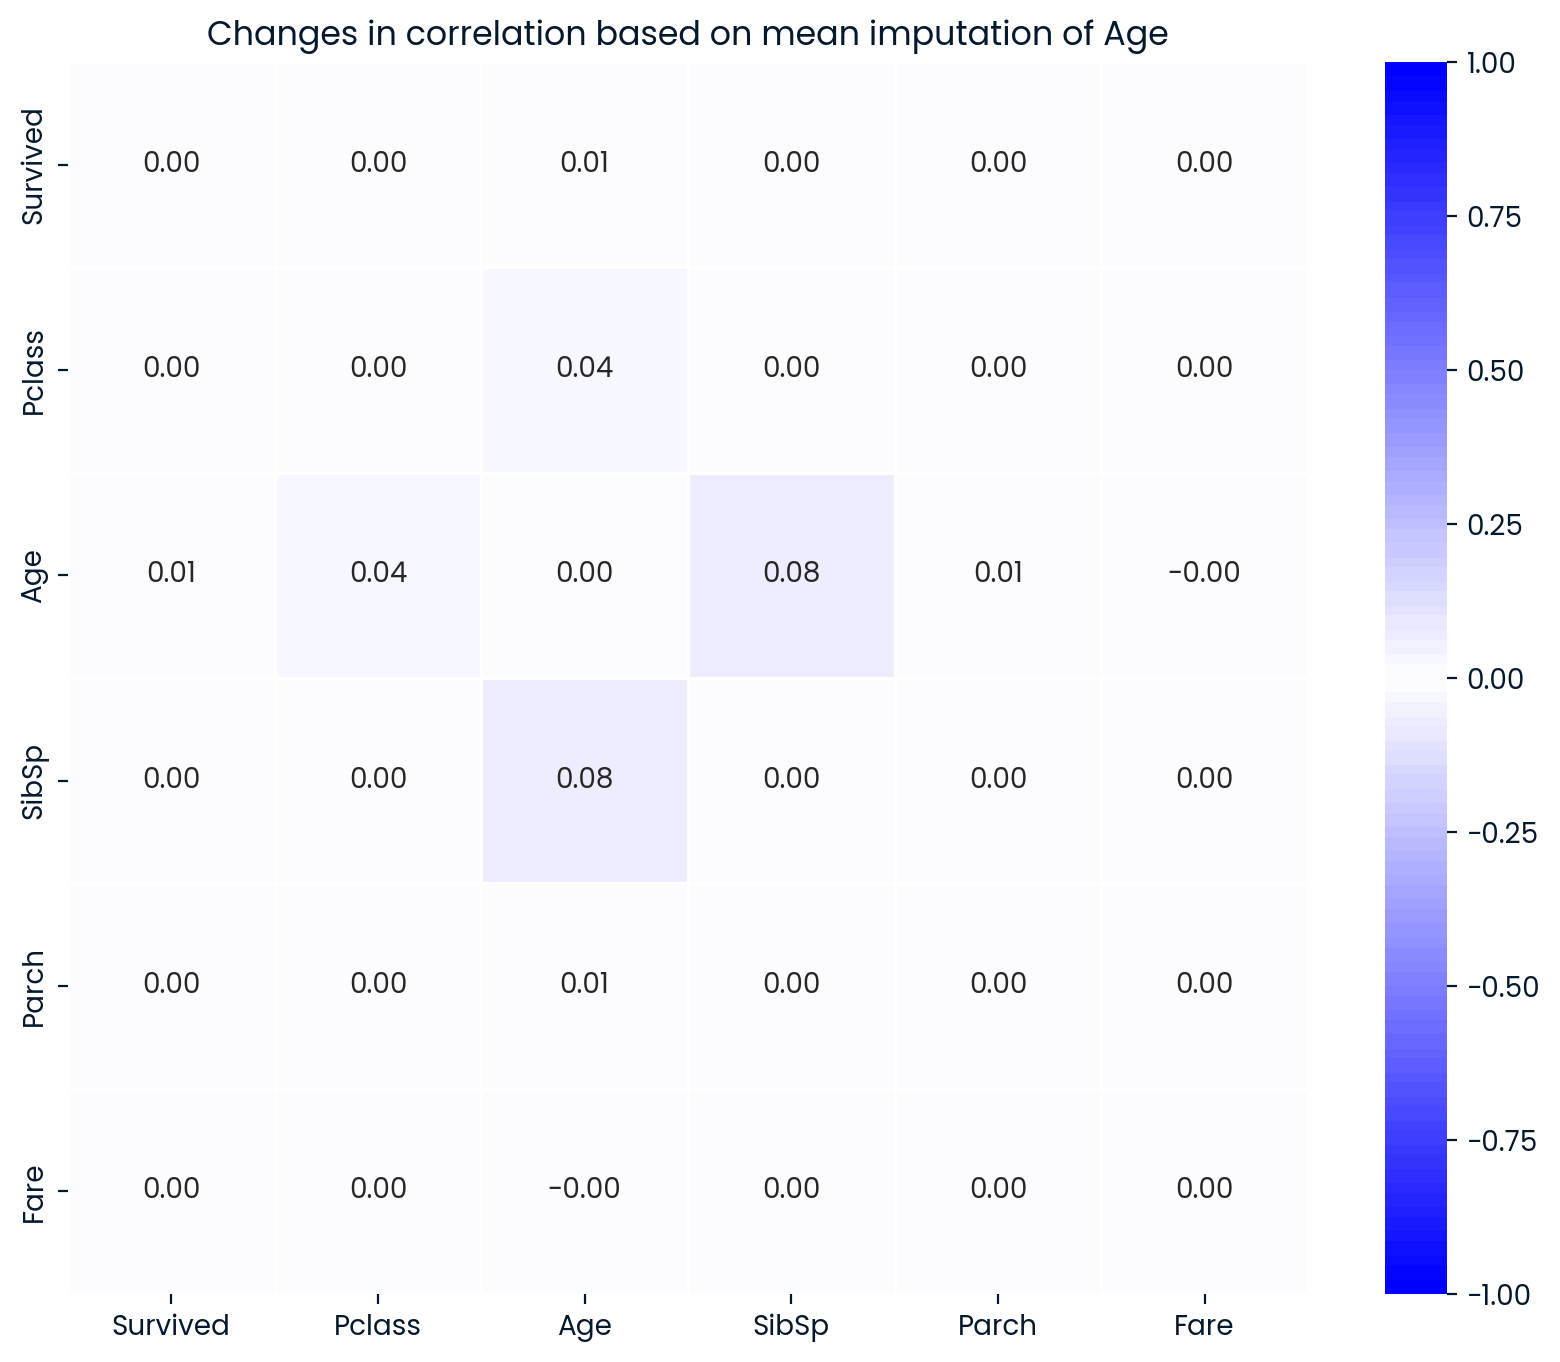

In [111]:
# Select only numerical columns for correlation
numerical_columns = train_2.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix2 = train_2[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix2 -correlation_matrix, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=0.5, center=0, vmin=-1, vmax=1)

# Set the title
plt.title('Changes in correlation based on mean imputation of Age')

# Show the plot
plt.show()

Looks like the character of the dataset is basically unchanged. 

### One Hot Encoding - String Variables to Binary
For the next preprocessing step, We need to change the string variables into binary classifiers using one hot encoding

In [112]:
# Perform one-hot encoding on 'Sex' and 'Embarked' columns. 
# Dropping extra column to avoid Dummy Variable Multicollinearity Trap  
train_3 = pd.get_dummies(train_2, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the modified dataset to confirm the changes
display(train_3.head())

#Need to change T-F to 1-0
train_3 = train_3.astype(int)

# Display the first few rows of the modified dataset to confirm the changes
display(train_3.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,1,0,1
1,1,1,38,1,0,71,0,0,0
2,1,3,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,0,3,35,0,0,8,1,0,1


### Scaling the data
For our final preprocessing step, we need to standardize the numerical data.

In [113]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
train_4 = train_3

# Fit the scaler on the 'Age' and 'Fare' columns and transform them
train_4[['Age', 'Fare','SibSp','Parch']] = scaler.fit_transform(train_4[['Age', 'Fare','SibSp','Parch']])

# Display the first few rows of the modified dataset to confirm the changes
display(train_4.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.580044,0.432793,-0.473674,-0.498948,1,0,1
1,1,1,0.650112,0.432793,-0.473674,0.789405,0,0,0
2,1,3,-0.272505,-0.474545,-0.473674,-0.498948,0,0,1
3,1,1,0.419458,0.432793,-0.473674,0.427056,0,0,1
4,0,3,0.419458,-0.474545,-0.473674,-0.478817,1,0,1


# Model Building
## Background

![download](download.png)


Before we begin building the model, it is worth going over some terminology:

A neural network is a type of machine learning model inspired by the human brain. It's designed to recognize patterns and make decisions based on data.

**Basic Building Blocks**
- Neurons (Nodes): The basic units of a neural network. Each neuron takes input, processes it, and passes the output to the next layer of neurons.
- Layers: Neurons are organized into layers:
    - Input Layer: The first layer that receives the raw data.
    - Hidden Layers: Intermediate layers that process the data. There are usually multiple hidden layers.
    - Output Layer: The final layer that produces the output (i.e. Binary Classifier in our case).

**How It Works**
- Input: Data is fed into the input layer. 
- Weights and Biases: Each connection between neurons has a weight, and each neuron has a bias. These are parameters that the network learns during training.
- Activation Function: Each neuron processes the input using an activation function, which introduces non-linearity. Common activation functions include ReLU (Rectified Linear Unit) and sigmoid.
- Forward Propagation: Data moves forward through the network, layer by layer. Each neuron in a layer takes the weighted sum of inputs from the previous layer (think dot product), adds the bias, applies the activation function, and passes the result to the next layer.
- Output: The final layer produces the output. In a binary classification problem like the Titanic dataset, the output is a probability that a passenger survived.

**Training the Network**
- Loss Function: The network's performance is measured using a loss function, which quantifies the difference between the predicted output and the actual target. For binary classification (our case), a common loss function is binary cross-entropy.
- Backpropagation: The network adjusts its weights and biases to minimize the loss. This is done using a process called backpropagation, which involves:
    - Calculating the gradient of the loss function with respect to each weight and bias.
    - Updating the weights and biases in the opposite direction of the gradient to reduce the loss. This is done using an optimization algorithm like Gradient Descent or its variants. Adam is a very effective variant that we will use
    - **Steps in Backpropagation**:
        - Forward Pass: Compute the output of the network for a given input by passing the data through all the layers.
        - Compute Loss: Calculate the loss using the loss function.
        - Backward Pass: Compute the gradients of the loss with respect to each weight and bias by propagating the error backward through the network.
        - Update Parameters: Adjust the weights and biases using the gradients and a learning rate, which controls the size of the updates.     

The training process is iterative (Each run on the dataset is called an Epoch) and continues until the loss stops decreasing significantly.

## Implementation

In [114]:
from sklearn.model_selection import train_test_split

# Separate 'Survived' into y_train
y_train = train_4['Survived']

# Separate the rest of the columns into X_train
X_train = train_4.drop(columns=['Survived'])

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


One of the big challenges in deep learning is that there an infinity of architechtures to choose from. We will start with a straighforward architechture and then tweak as we go along. Here is the idea of what we will do:
1) Input layer and first hidden layer
    - **64 Neurons**: A reasonable starting point for the first hidden layer. We will experiment with this number.
    - **input_dim=X_train.shape[1]**: The input dimension should match the number of features in our training data.
    - **activation='relu'**: ReLU activation function introduces non-linearity and helps the model learn complex patterns. It is very commonly used
2) 0.5 Dropout Rate: This means that 50% of the neurons will be randomly turned off during training. This can help prevent overfitting 
3) Second Hidden Layer
    -  **32 Neurons**: A smaller number of neurons compared to the first layer, which is common practice as the network gets deeper.
    - **activation='relu'**: Again, ReLU is used for non-linearity.
4) Another 0.5 Dropout layer to avoid overiftting
5) Output Layer:
    - **1 Neuron**: Since this is a binary classification problem, the output layer has a single neuron.
    - **activation='sigmoid'**: The sigmoid activation function outputs a probability value between 0 and 1, which is suitable for binary classification.
6) Adam was chosen as the optimizer over traditional gradient descent. It has an adaptive learning rate, which helps performance and increase speed of convergence 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4197 
Validation Accuracy: 0.8268


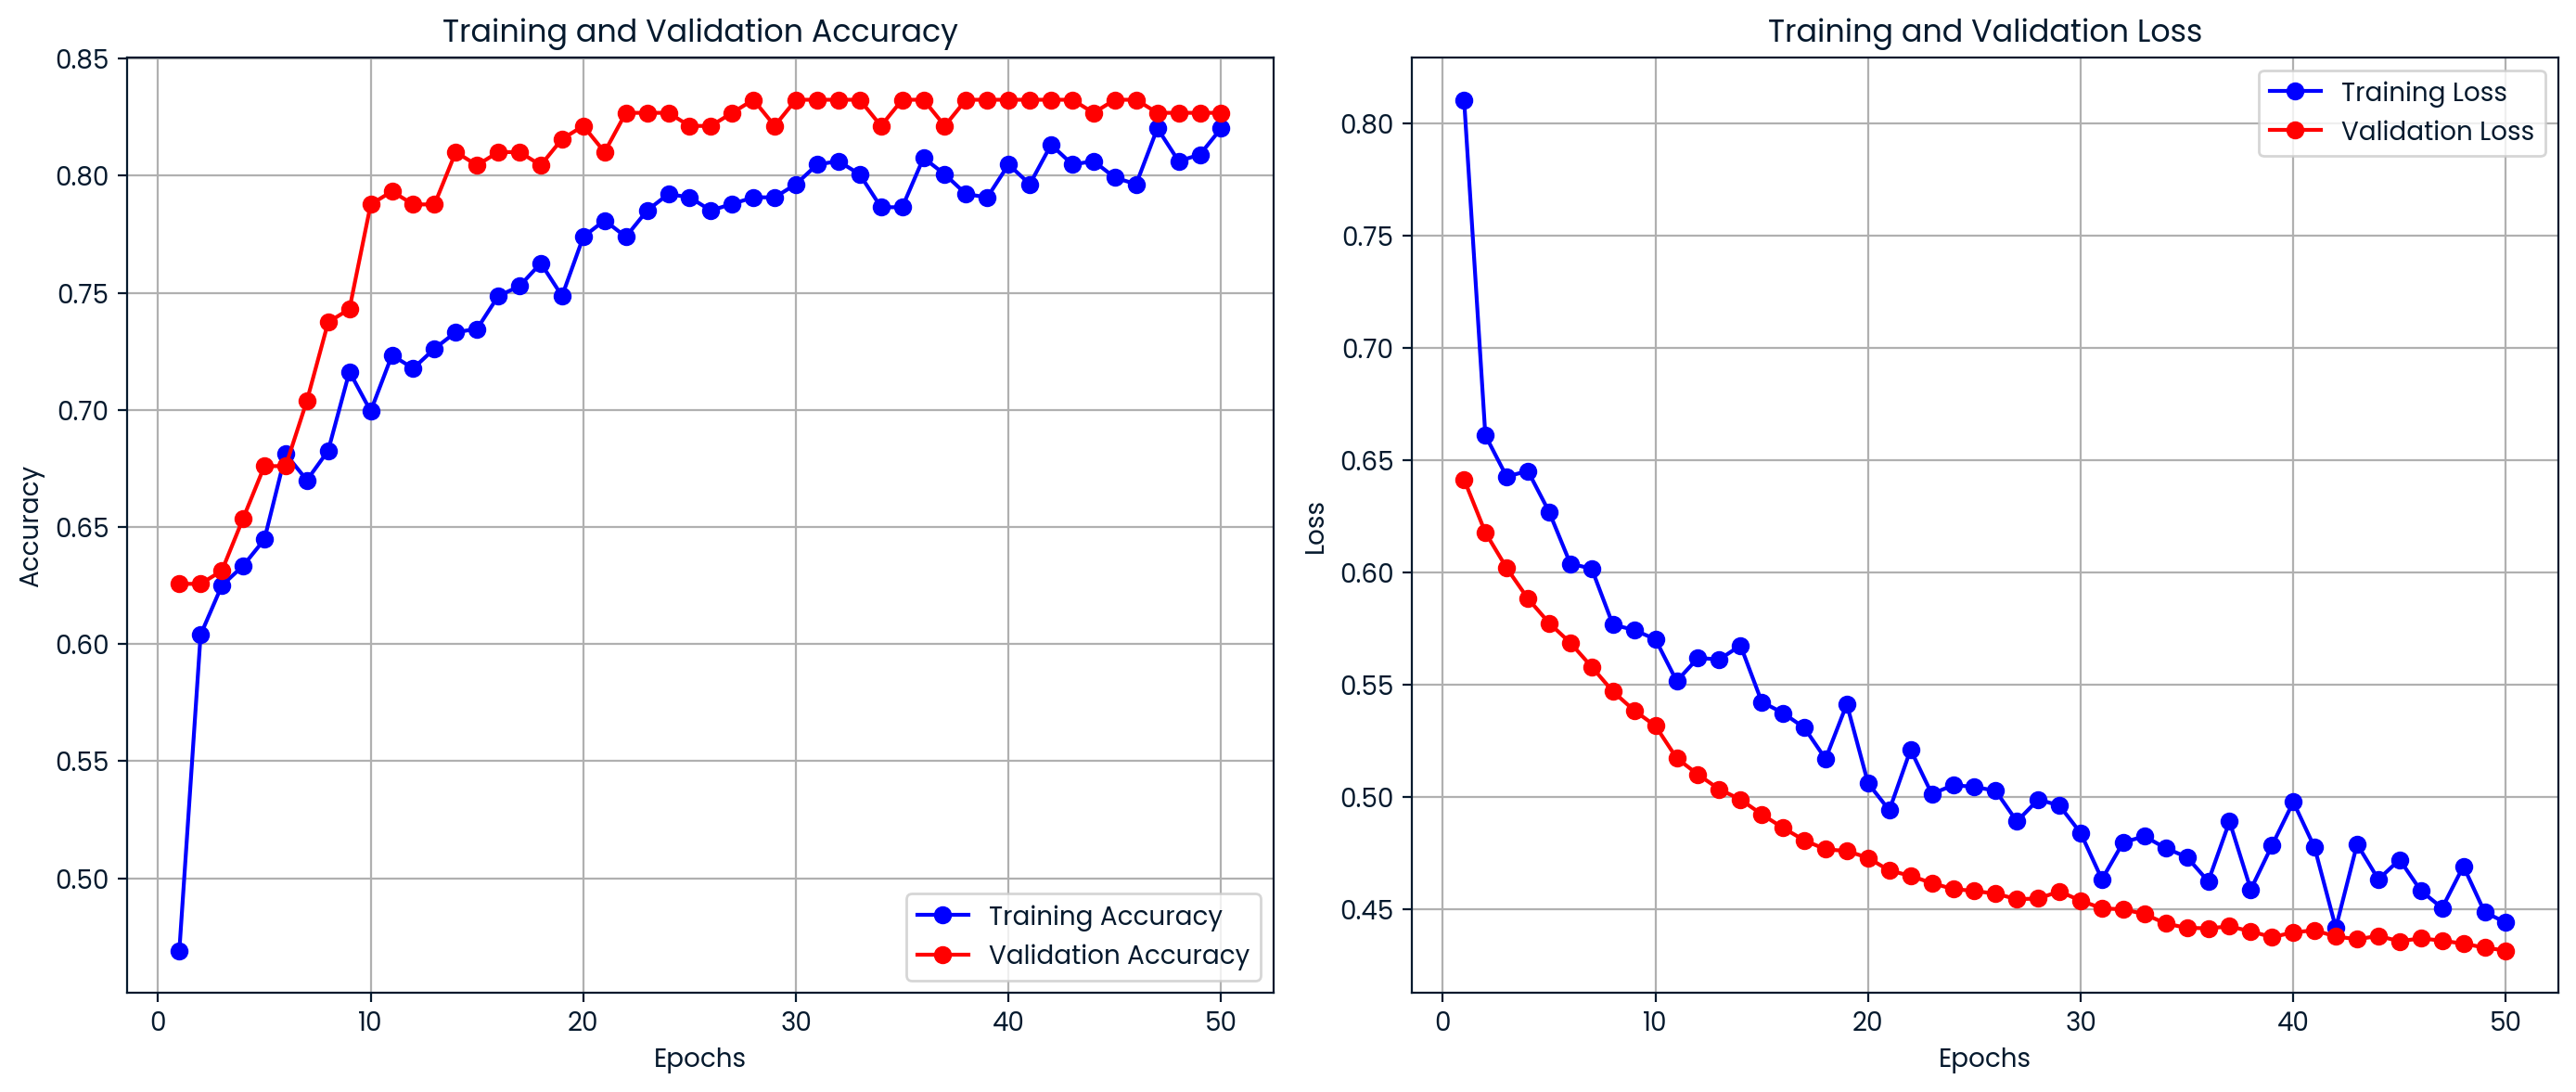

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
num_epochs=50
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_val, y_val),verbose=0)


# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')

#Extract accuracy and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(range(1, len(train_accuracy) + 1), val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, 'bo-', label='Training Loss')
plt.plot(range(1, len(train_loss) + 1), val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

Not bad for a first draft. We see that the accuracy peaks at around 30 Epochs. Lets try adding another hidden layer and increasing the number of neurons in the first layer and see if the additonal complexity gives us better results

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8188 - loss: 0.4219 
Validation Accuracy: 0.8045


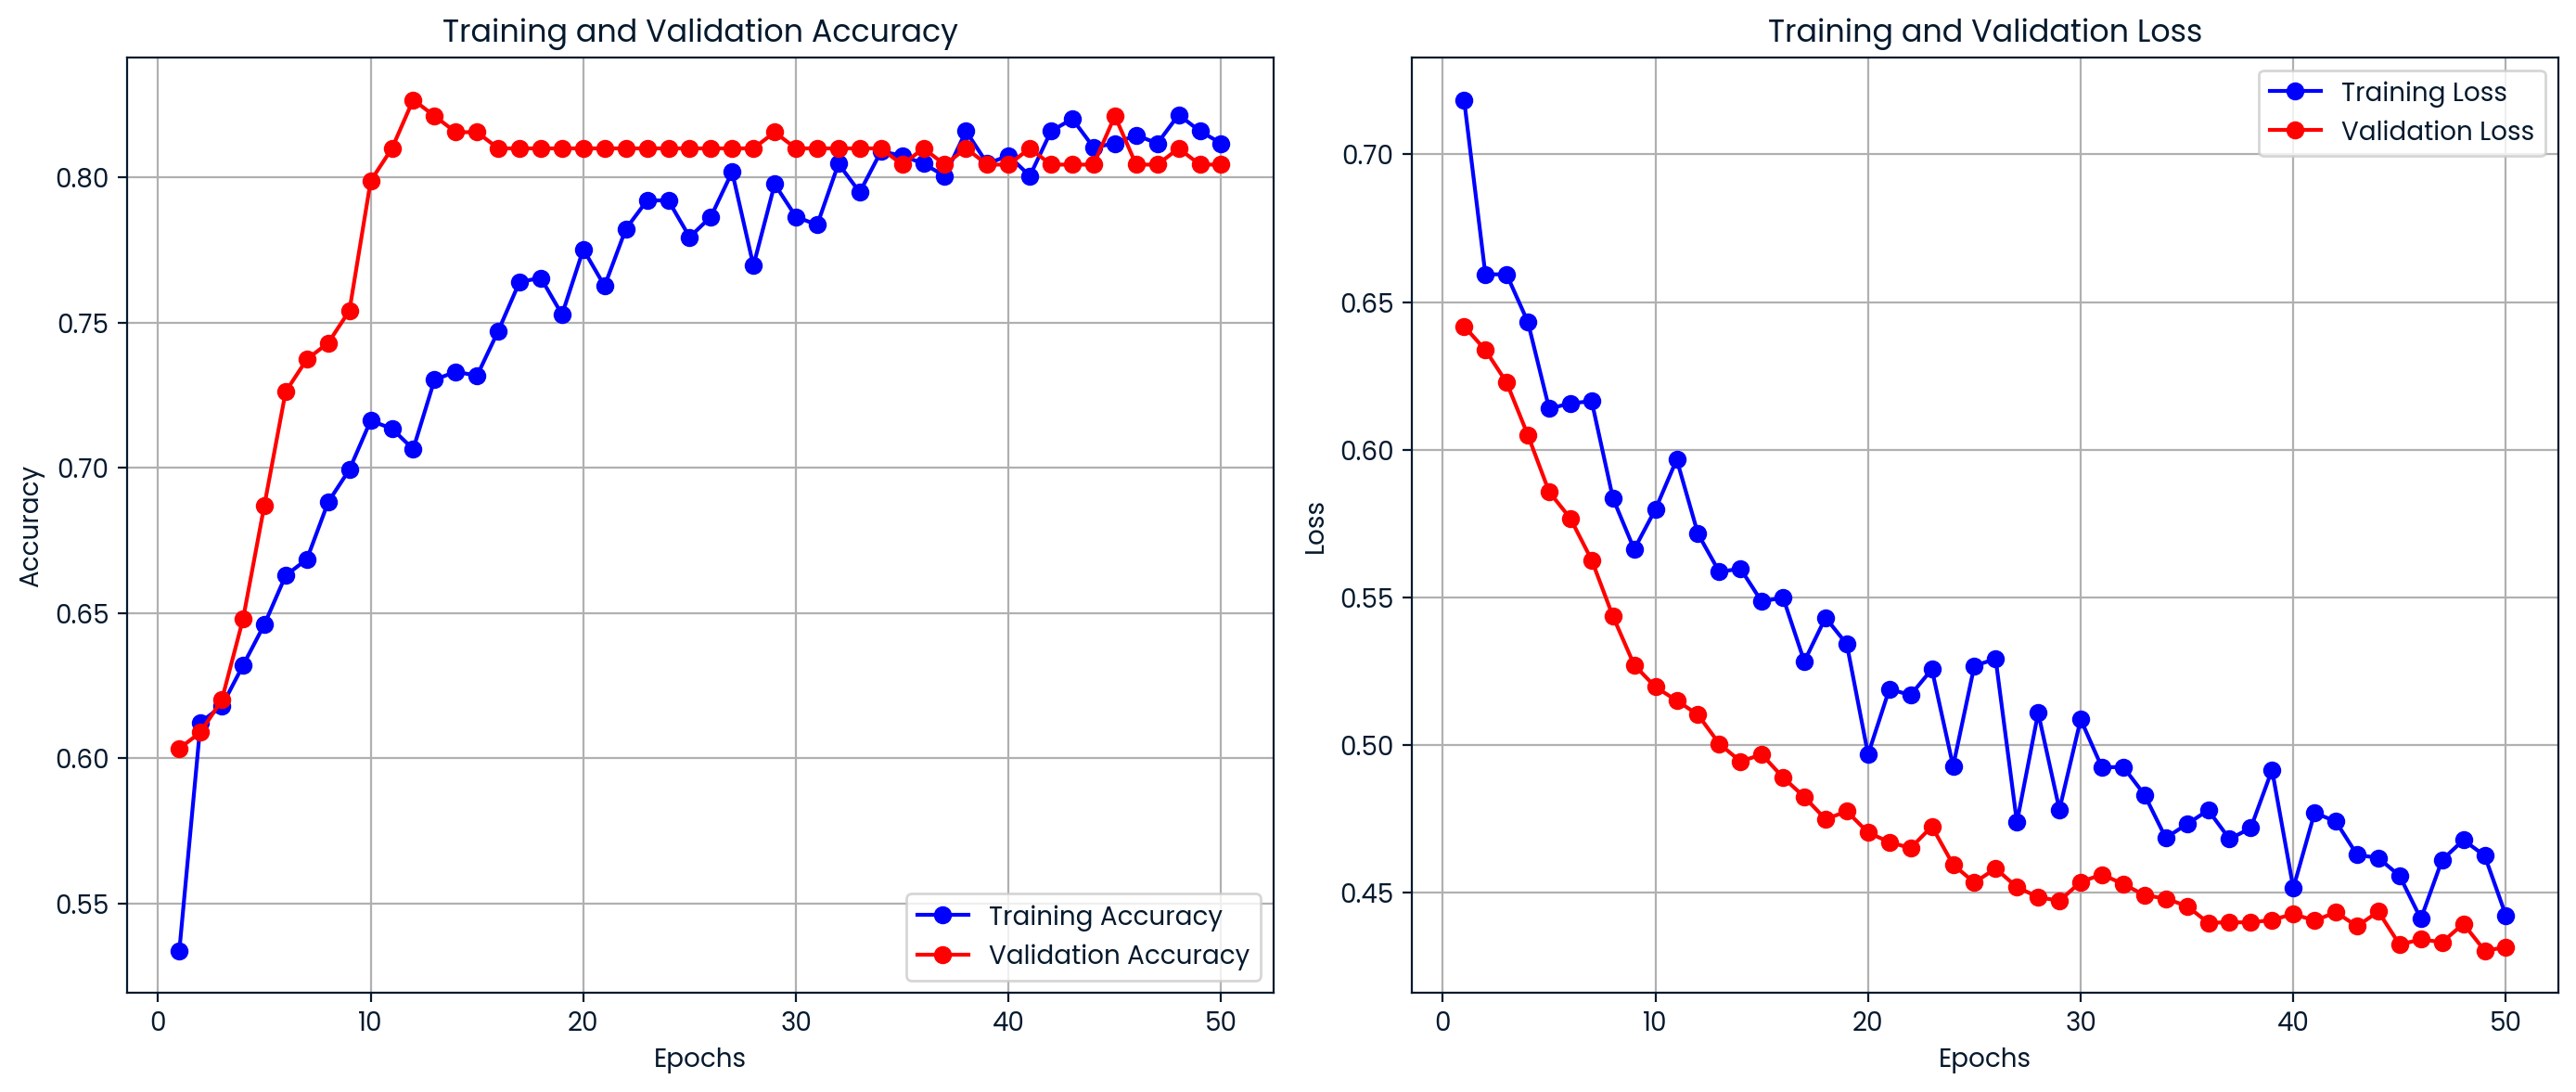

In [116]:
# Build the neural network model
model_2 = Sequential()
model_2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
num_epochs=50
history = model_2.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_val, y_val),verbose=0)


# Evaluate the model on the validation set
val_loss, val_accuracy = model_2.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')

#Extract accuracy and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(range(1, len(train_accuracy) + 1), val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, 'bo-', label='Training Loss')
plt.plot(range(1, len(train_loss) + 1), val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

Interesting. Despite the additional model complexity, the accuracy did not reallyimprove

## Hyperparameter Tuning
Next, we will implement hyperparameter tuning to see if we can further improve our model 

In [117]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

class TitanicHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        # Finding optimal number of neurons in hidden layer 1 
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                        input_dim=X_train.shape[1], activation='relu'))
        # Finding optimal number dropout rate before hidden layer 2
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
        # Finding optimal number of neurons in hidden layer 2 
        model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
        # Finding optimal number dropout rate before hidden layer 3
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
        # Finding optimal number of neurons in hidden layer 3 
        model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=32), activation='relu'))
        # Finding optimal number dropout rate before output layer
        model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

# Initialize the hypermodel
hypermodel = TitanicHyperModel()

# Initialize the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=20,  # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per trial for robustness
    directory='my_dir',
    project_name='titanic_tuning')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"units_1: {best_hyperparameters.get('units_1')}")
print(f"dropout_1: {best_hyperparameters.get('dropout_1')}")
print(f"units_2: {best_hyperparameters.get('units_2')}")
print(f"dropout_2: {best_hyperparameters.get('dropout_2')}")
print(f"units_3: {best_hyperparameters.get('units_3')}")
print(f"dropout_3: {best_hyperparameters.get('dropout_3')}")
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f'Best Validation Accuracy: {val_accuracy:.4f}')

Reloading Tuner from my_dir/titanic_tuning/tuner0.json
Best Hyperparameters:
units_1: 128
dropout_1: 0.2
units_2: 96
dropout_2: 0.2
units_3: 64
dropout_3: 0.2
Best Validation Accuracy: 0.8436


We see that we were able to improve our accuracy by a few percentage points.  Interestingly, while each layer has a different number of neurons, the dropout layers each have the same rate. 

## Discussion and Conclusions

In this project, I aimed to predict the survival of passengers on the Titanic using a deep learning model. I employed Keras Tuner to perform hyperparameter optimization, exploring various configurations of the neural network, including the number of units in each layer and dropout rates. The best model achieved a validation accuracy of 84.36%.

While these results are not bad, there are some techniques that could be used to potentially improve results in further iterations of this work:

1) Hyperparameter tuning could be expanded to include different optimizers, loss functions, batch sizes, and activation functions in the hidden layers. Additionally, we could add Grid Search instead of Random Search. These methods are much more computationally expensize and would require additional computing power. 
2) Feauture engineering to derive new features from existing ones, like combining SibSp and Parch into one unit called family size
3) Class Imbalance could be addressed by Synthetic Minority Over-sampling Technique (SMOTE)
4) L1 or L2 regularization could be added to the dense layers to penalize large weights and avoid overfitting. (I will add that overfitting did not appear to be a problem in this instance) 